In [2]:
# Libraries and initial setup
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Capstone Project: Loans Dashboard


![](final_dashboard.png)

## Load Data

Let's begin by reading our dataset in. The data we'll be using is `loan_2015.csv` which located under `data/` directory.

**Task 1**:

**1.1.** Recall how you could use `pd.read_csv()` to read the data. When you read the data in, use `id` as `index_col` and parse `issue_d` column as date with `parse_dates`and stored the dataframe as an object named `df`!

**1.2.** Use `.head()` method to check if you have done the it correctly.

In [35]:
## Your code here


,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,loan_amount,...,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region,issue_md
id,,,,,,,,,,,,,,,,,,,,,
68444620,2015,2015-01-12,1012016,10.0,MORTGAGE,3,Medium,128000,2,35000,...,11.99,C,3,6.46,0.0,0.0,0.0,778.38,leinster,Jan-12
68547583,2015,2015-01-12,1012016,0.5,MORTGAGE,3,Low,100000,1,8650,...,5.32,A,1,7.28,0.0,0.0,0.0,260.50,cannught,Jan-12
67849662,2015,2015-01-12,1012016,5.0,RENT,1,Low,35000,1,4225,...,14.85,C,3,15.22,0.0,0.0,0.0,146.16,cannught,Jan-12
68506885,2015,2015-01-12,1012016,10.0,RENT,1,Low,42500,1,10000,...,11.99,C,3,31.04,0.0,0.0,0.0,222.40,cannught,Jan-12
68341763,2015,2015-01-12,1012016,10.0,MORTGAGE,3,Low,63000,1,20000,...,10.78,B,2,10.78,0.0,0.0,0.0,432.66,cannught,Jan-12


**1.3.** Once you've done the previous task correctly, using the code above, try to paste down the code in `app.py` (You will find hints on where to put the code in the script).

## Extract Values for Cards

The dashboard has 4 cards, where each card shows the following summary respectively:

- **No. Loan Applicants**: Total loan applicants (1 row = 1 applicant).
- **Average Loan Amounts**: The average `loan_amount` in January 2015.
- **Good Loan percentage**: The percentage of customer with good loan (`loan_condition` = `Good Loan`)
- **Bad Loan percentage**: The percentage of customer with bad loan (`loan_condition` = `Bad Loan`)


**Task 2**:

**2.1.** Recall how you could extract the length of your data with `.shape` to get the value of total loan applicants. Store the result as an object named `num_applicants`.

**2.2.** Extract the average loan amounts with `.mean()` and round up the values to two decimals with `.round()`. Store the result as an object named `avg_loan_amounts`

**2.3.** Recall how you could use `pd.crosstab()` to get the proportion of a categorical values. Fill in the blank (____) part of the code below to extract the values for the remaining cards!

```py
cond = pd.crosstab(
        index = ____,
        columns = "percent",
        normalize= ____
    )*100

# Value for Good Loan Percentage
good_loan = round(____,2)

# Value for Bad Loan Percentage
bad_loan = round(____,2)

```

In [1]:
# Your code here


**2.4.** Fill in the blank (____) part of the code below to store each value as `card_data` dictionary!

In [16]:
card_data = dict(
        num_applicants =  f'{____:,}',
        avg_loan_amounts = f'{____:,}',
        good_loan = f'{____:,}%',
        bad_loan = f'{____:,}%'
    )

card_data

{'num_applicants': '421,094',
 'avg_loan_amounts': '15,240.26',
 'good_loan': '97.13%',
 'bad_loan': '2.87%'}

**2.5.** Once you've done, use the codes to fill up the blank codes in `app.py` (`Task 2`)

## Generate Plot

`loans.py` stores the skeletons of functions to create plots under the "Performance Overview" tab. Complete the following tasks to fill up the blank part of `loans.py`!

### Total Loans by Region


**Task 3.1.**:

`.str.title()` to converts the first character of each region to a capital (uppercase) letter:

In [23]:
# Example on how `.str.title()` works
names = pd.Series(['matthew','alison','jocelyn'])
names.str.title()

0    Matthew
1     Alison
2    Jocelyn
dtype: object

**3.1.1.** Fill in the blank (___) part of the code below to change the values in `region` series:

```py
df.region = ______.str.title()

```

In [24]:
df.region = df.region.str.title()

**3.1.2.** Fill in the blank (___) part of the code below to create the *Total Loans by Region* plot. It compares the number of applicants (row numbers) per each `region`. 

```py
plt_region = df.region.____________
```

*Hint*:
   - Recall how you could use `.value_counts()` to get counts of unique values in a column.
   - Chain the result with `.plot(kind='bar')` to represent the values barchart. Don't worry about the plot's customization (plot title, axis rotation, etc.) as it's provided on the app skeleton. If you want to try on the customization, you could paste down the following codes below your answer:

```py
# additional customization
plt_region.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt_region.get_figure().suptitle('Total Loans by Region')
plt.xticks(rotation = 0)
```

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Leinster'),
  Text(1, 0, 'Northern-Irl'),
  Text(2, 0, 'Ulster'),
  Text(3, 0, 'Cannught'),
  Text(4, 0, 'Munster')])

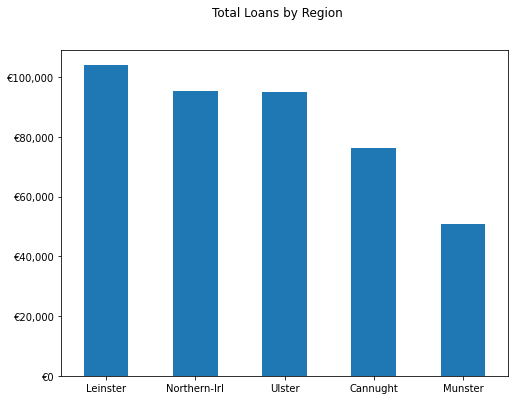

In [27]:
plt_region = df.region.____________

plt_region.yaxis.set_major_formatter(mtick.StrMethodFormatter('€{x:,.0f}'))
plt_region.get_figure().suptitle('Total Loans by Region')
plt.xticks(rotation = 0)

### Loan Amounts by Term

**Task 3.2.**

**3.2.1.** Fill in the blank (___) part of the code below to create the *Loan Amounts by Term* plot. It compares the distribution of loan amount (`loan_amount`) by each loan `term`.

```py
plt_term = df[_________].boxplot(by = ___)
```

*Hint*:
- Perform subsetting on the dataframe to extract `loan_amount` and `term` columns from the data.

- Make sure the boxplot is comparing the loan amount distribution by each loan `term`  

- If you want to add extra customization on the result you could paste down the following codes below you answer (it also provided on `loans.py` skeleton):

```py
# additional adjustments
plt.tight_layout()
plt_term.yaxis.set_major_formatter(mtick.StrMethodFormatter('€{x:,.0f}'))
plt_term.get_figure().suptitle('Loan Amounts by Term')
plt_term.get_figure().gca().set_xlabel("")
plt_term.get_figure().gca().set_title("")
```


Text(0.5, 1.0, '')

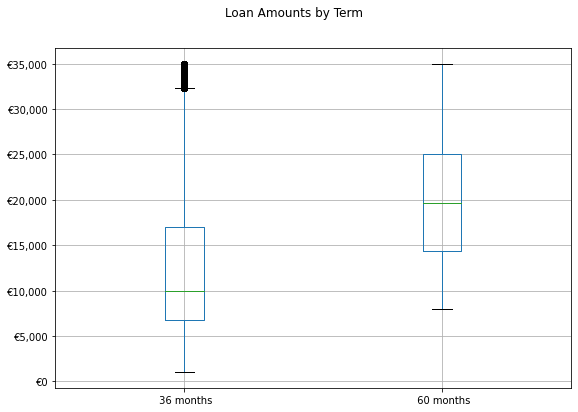

In [30]:
plt_term = df[_________].boxplot(by = ___)

# additional adjustments
plt.tight_layout()
plt_term.yaxis.set_major_formatter(mtick.StrMethodFormatter('€{x:,.0f}'))
plt_term.get_figure().suptitle('Loan Amounts by Term')
plt_term.get_figure().gca().set_xlabel("")
plt_term.get_figure().gca().set_title("")

### Total Loans by Purpose

In *Task 3.1*, you've learnt that using `.str` provides methods to manipulate strings value in `pd.Series`. In the cell below, we're using another methods from `.str` to tidy up the values of `loan_purpose` column.


In [ ]:
# before adjustment
df.purpose.head()

In [31]:
# after adjustment
df.purpose = df.purpose.str.replace("_"," ").str.title()
df.purpose.head()

id
68444620      Home Improvement
68547583           Credit Card
67849662    Debt Consolidation
68506885    Debt Consolidation
68341763      Home Improvement
Name: purpose, dtype: object

**Task 3.3.**

**3.3.1.** Fill in the blank (___) part of the code below to create the *Total Amount by Purpose* plot. It compares the number of applicants (row numbers) by purposes.

```py
plt_purpose = df.purpose.______.tail(8).plot(kind='barh')
```

*Hint*:
- Recall how you could use `value_counts()` to get the total applicants. Since `barh` plot is flipping the axis to create horizontal barchart, we also need to rearrange the values from lowest to highest by adding `ascending=True` parameter.


In [1]:
plt_purpose = df.purpose.______.tail(8).plot(kind='barh')
plt_purpose

**3.3.2.** Use your codes in Task 3.1.-3.3. to complete the `loans.py` skeleton. Once all the skeleton has completed, you could run `flask run` to show your dashboard

## Final Task: Create your own

We have prepared a `Create-Your-Own` tab on the app where you and your group can play around with the dataframe and come up with your own charts. Don't forget to do the following steps:

- Pass the variable onto the `render_template()` from `index()` in `app.py`
- Make your analysis output as separate function on `loans.py` to keep the `app.py` as clean as possible, making it easy to debug.
- Update the `index.html` to make sure it displays your intended output on the page. You can copy-and-paste the skeleton from the other plots or values

If you need any help, do not hesitate to reach the TAs.

Good luck!

In [33]:
## Your code here

